# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [66]:
# !pip install category_encoders
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [67]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Decision Tree\Company_Data.csv')
data.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [68]:
data.shape

(400, 11)

There are 400 instances and 11 variables in the dataset

In [69]:
data.duplicated().any()

False

There are no duplicates

In [70]:
# statistical data
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Types of Variables

## 1. Categorical Variable

In [71]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 3 categorical variables

The categorical varaibles are :

 ['ShelveLoc', 'Urban', 'US']


In [72]:
data[categorical].head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [73]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no missing values 

In [74]:
# checking labels in ShelveLoc variable
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [75]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

## 2. Numerical Variable

In [76]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [77]:
data[numerical].head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [78]:
# checking missing values
data[numerical].isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
Age            0
Education      0
dtype: int64

There are no null values

## Converting Categorical Variable to Numerical Value

In [79]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
new_data = encoder.fit_transform(data)
new_data.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1


## Converting the Target Variable 'Sales' into a Categorical Variable

In [80]:
data['Sales'].mean()

7.496325000000001

In [81]:
# creating a column 'company_val'
company_val = []
for value in data["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

new_data["company_val"]= company_val

In [82]:
new_data.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high


In [83]:
new_data['company_val'].value_counts()

low     201
high    199
Name: company_val, dtype: int64

The dataset of the the column 'company_val' is highly balance between high and low

# Data Visualisation

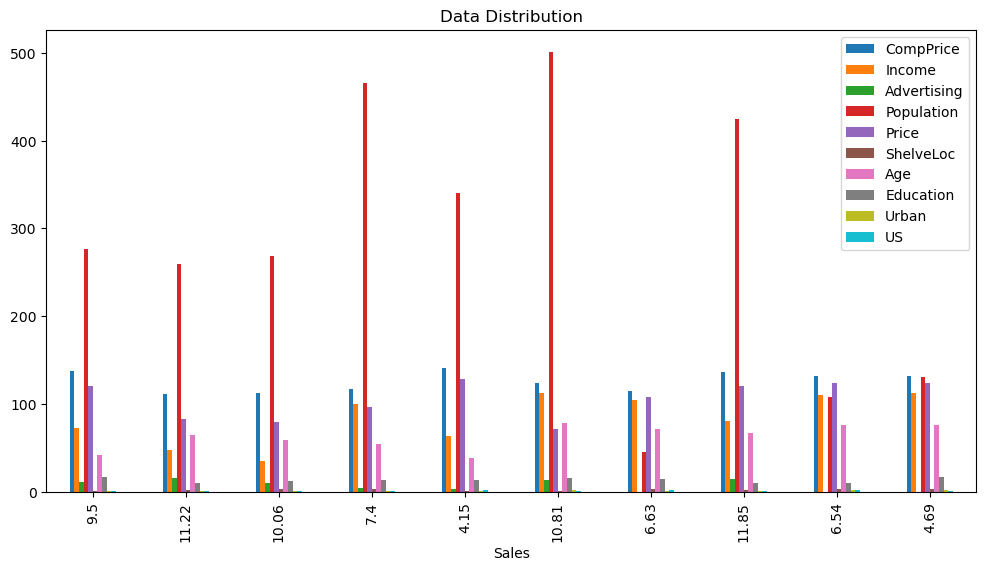

In [84]:
subset_data = new_data.iloc[0:10]

# Plotting the bar chart
subset_data.plot.bar(x='Sales', figsize=(12, 6), title='Data Distribution')

# Show the plot
plt.show()

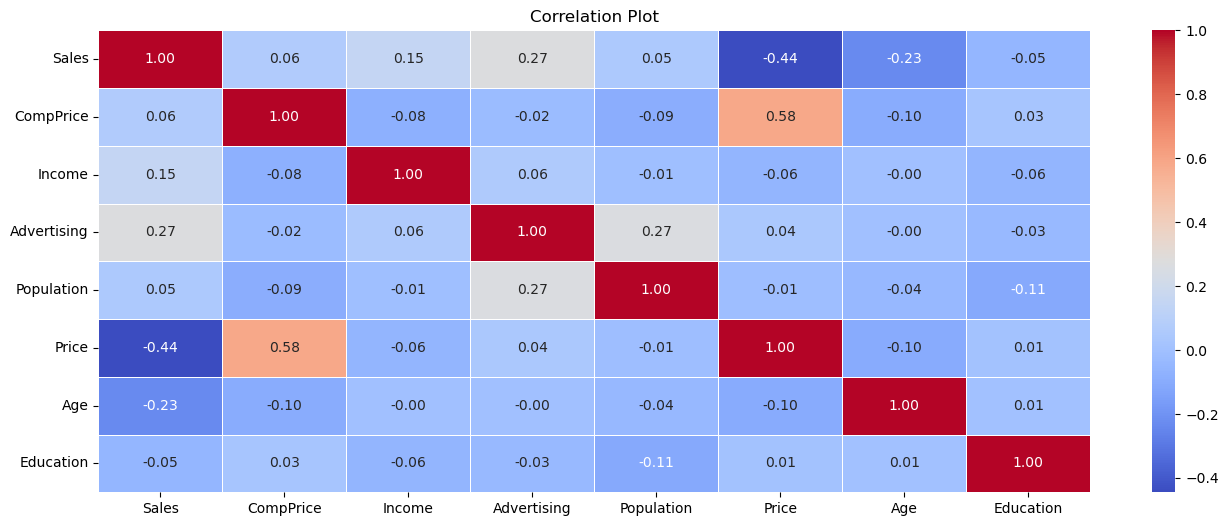

In [85]:
# checking correlation
data.corr()
correlation_matrix = data.corr()      
plt.figure(figsize=(16,6))        
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

## Segregating Features and Target Variable

In [86]:
X = new_data.drop(['company_val','Sales'], axis =1)
y = new_data['company_val']

In [87]:
X.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1


In [88]:
y.head(3)

0    high
1    high
2    high
Name: company_val, dtype: object

# Building Decision Tree Classifier using Entropy Criteria

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled

array([[-0.23766408, -0.32187744,  0.25945921, ..., -0.32161305,
         1.48942633, -0.78050971],
       [-0.61901619, -0.07505436, -0.97974897, ...,  1.20468618,
         1.48942633,  1.28121405],
       [ 1.41486172,  0.24228959,  1.03396433, ..., -1.46633748,
        -0.67139944, -0.78050971],
       ...,
       [-0.36478145, -1.45021148, -0.97974897, ..., -1.46633748,
        -0.67139944,  1.28121405],
       [ 0.46148145,  1.22958188,  2.1182715 , ..., -1.08476267,
        -0.67139944, -0.78050971],
       [-0.74613356, -1.59125324, -0.97974897, ...,  0.82311137,
         1.48942633,  1.28121405]])

In [91]:
X_test_scaled

array([[-1.69951383, -1.62651368,  0.72416228, ..., -1.08476267,
         1.48942633, -0.78050971],
       [-0.23766408,  0.66541486,  0.56926126, ..., -1.46633748,
        -0.67139944, -0.78050971],
       [-0.68257487, -1.02708622,  1.03396433, ...,  0.82311137,
        -0.67139944, -0.78050971],
       ...,
       [ 1.35130304, -1.45021148,  0.72416228, ..., -1.46633748,
        -0.67139944, -0.78050971],
       [-0.61901619, -1.34443017,  3.04767764, ..., -0.32161305,
        -0.67139944, -0.78050971],
       [-0.1741054 ,  0.06598739,  0.10455819, ...,  0.82311137,
         1.48942633, -0.78050971]])

We are now ready with the training and testing set for building the model

## Decision Tree Classifier Model1

In [92]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [93]:
#Predicting on train data
pred_train1 = model1.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

#Predicting on test data
pred_test1 = model1.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)

Train data Accuracy is: 76.42857142857142
Test data Accuracy is: 71.66666666666667


In [94]:
#Predicting on test data
pred_test1 = model1.predict(X_test) 
pd.Series(pred_test1).value_counts() # getting the count of each category 

low     77
high    43
dtype: int64

In [95]:
pred_test1

array(['high', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high', 'high', 'high', 'high', 'high', 'low',
       'low', 'low', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'low', 'low', 'high'], dtype=object)

In [96]:
# creating a cross-tabulation table/frequency distibution table
pd.crosstab(y_test,pred_test1) # getting the 2 way table to understand the correct and wrong predictions

col_0,high,low
company_val,,
high,37,28
low,6,49


Count of true positives, true negatives, false positives, and false negatives

In [97]:
# Accuracy 
np.mean(pred_test1==y_test)

0.7166666666666667

## Decision Tree Classifier Model2

In [98]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [99]:
#Predicting on train data
pred_train2 = model2.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

#Predicting on test data
pred_test2 = model2.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)

Train data Accuracy is: 86.78571428571429
Test data Accuracy is: 73.33333333333333


## Decision Tree Classifier Model3

In [100]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=8)
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [101]:
#Predicting on train data
pred_train3 = model3.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

#Predicting on test data
pred_test3 = model3.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)

Train data Accuracy is: 94.64285714285714
Test data Accuracy is: 68.33333333333333


## Visualizing Decision Tree

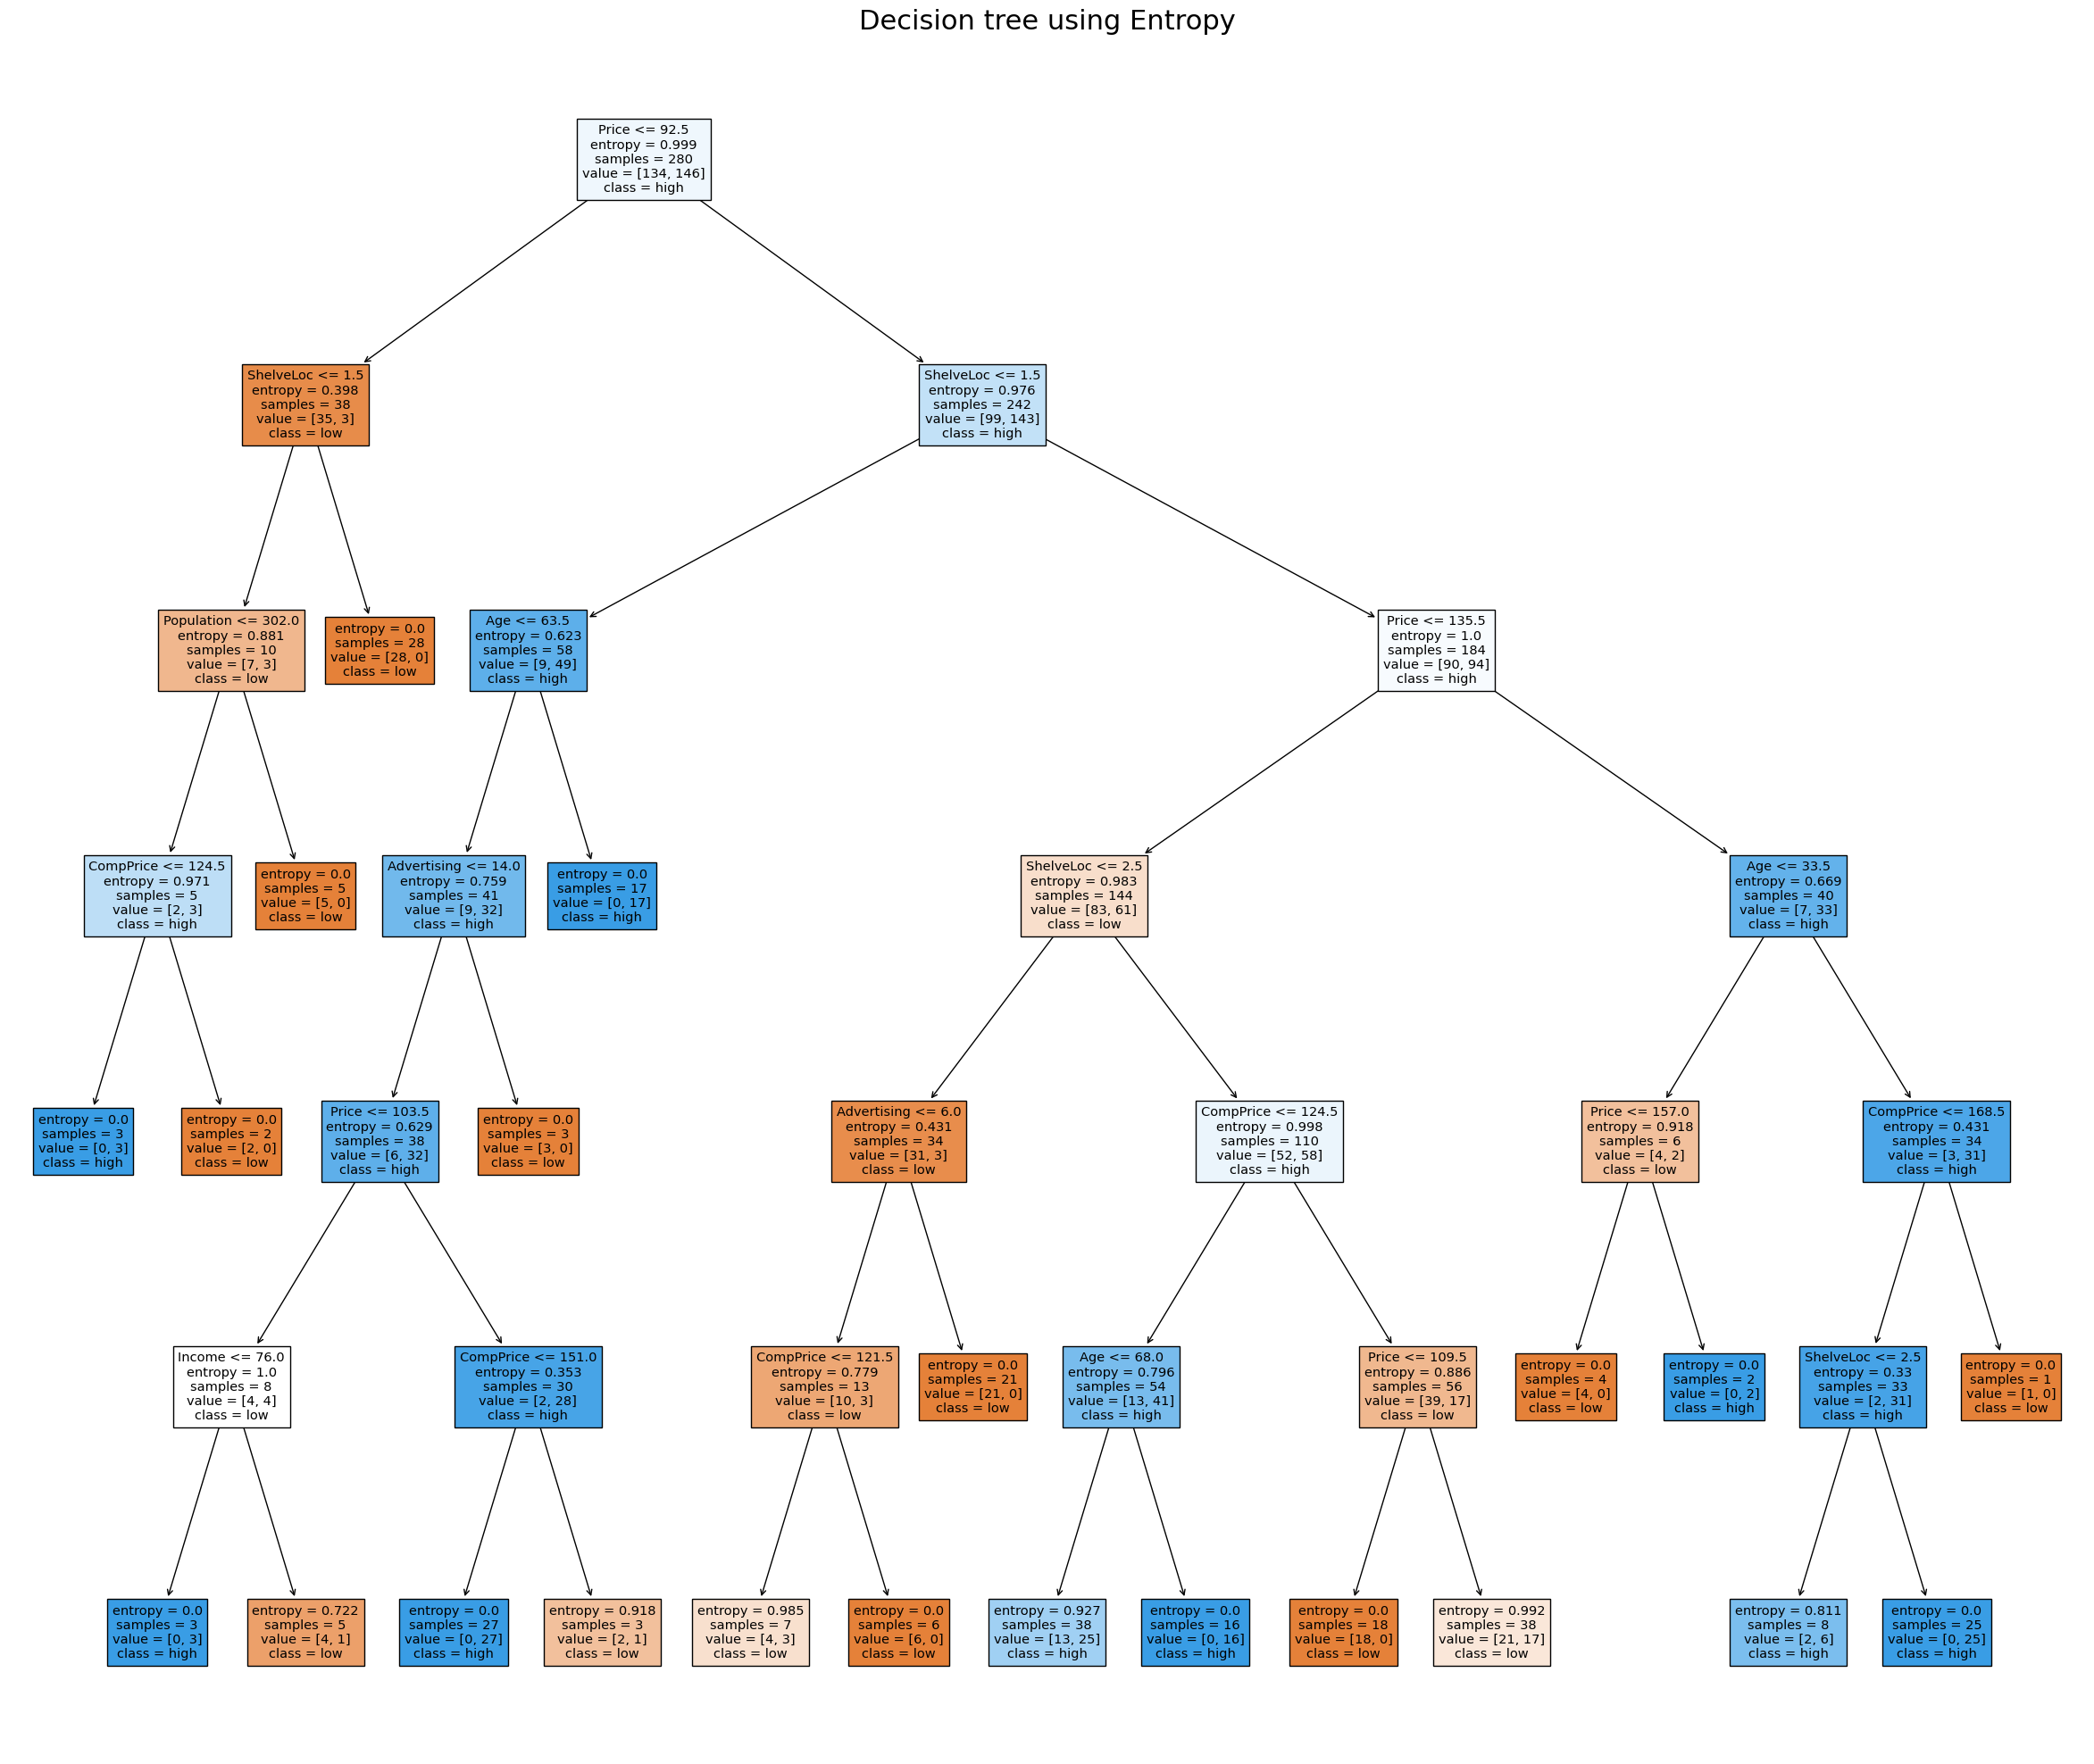

In [102]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

# PLot the decision tree
# tree.plot_tree(model1);

# Building Decision Tree Classifier (CART) using GINI Criteria

## Model Gini1

In [103]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [104]:
#Predicting on train data
pred_train1 = model_gini1.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

#Predicting on test data
pred_test1 = model_gini1.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)

Train data Accuracy is: 72.14285714285714
Test data Accuracy is: 65.0


In [105]:
#Prediction and computing the accuracy
pred=model_gini1.predict(X_test)
np.mean(pred_test1==y_test)

0.65

## Model Gini2

In [106]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [107]:
#Predicting on train data
pred_train2 = model_gini2.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

#Predicting on test data
pred_test2 = model_gini2.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)

Train data Accuracy is: 87.14285714285714
Test data Accuracy is: 70.83333333333334


## Model Gini3

In [108]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [109]:
#Predicting on train data
pred_train3 = model_gini3.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

#Predicting on test data
pred_test3 = model_gini3.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)

Train data Accuracy is: 94.64285714285714
Test data Accuracy is: 70.0


In [110]:
# Frequency 
preds = model_gini3.predict(X_test)    # making predictions on the test set x_test

# creating a Pandas Series from the predictions and counting the occurrences of each unique value (class) in the predictions.
pd.Series(preds).value_counts()

high    63
low     57
dtype: int64

In [111]:
pred_test1

array(['high', 'high', 'high', 'low', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'high', 'high', 'low', 'high', 'low', 'low',
 

In [112]:
# creating a cross-tabulation table/frequency distibution table
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,46,19
low,17,38


Count of true positives, true negatives, false positives, and false negatives

In [113]:
# Accuracy
np.mean(preds==y_test)*100

70.0

## Visualizing Decision Tree

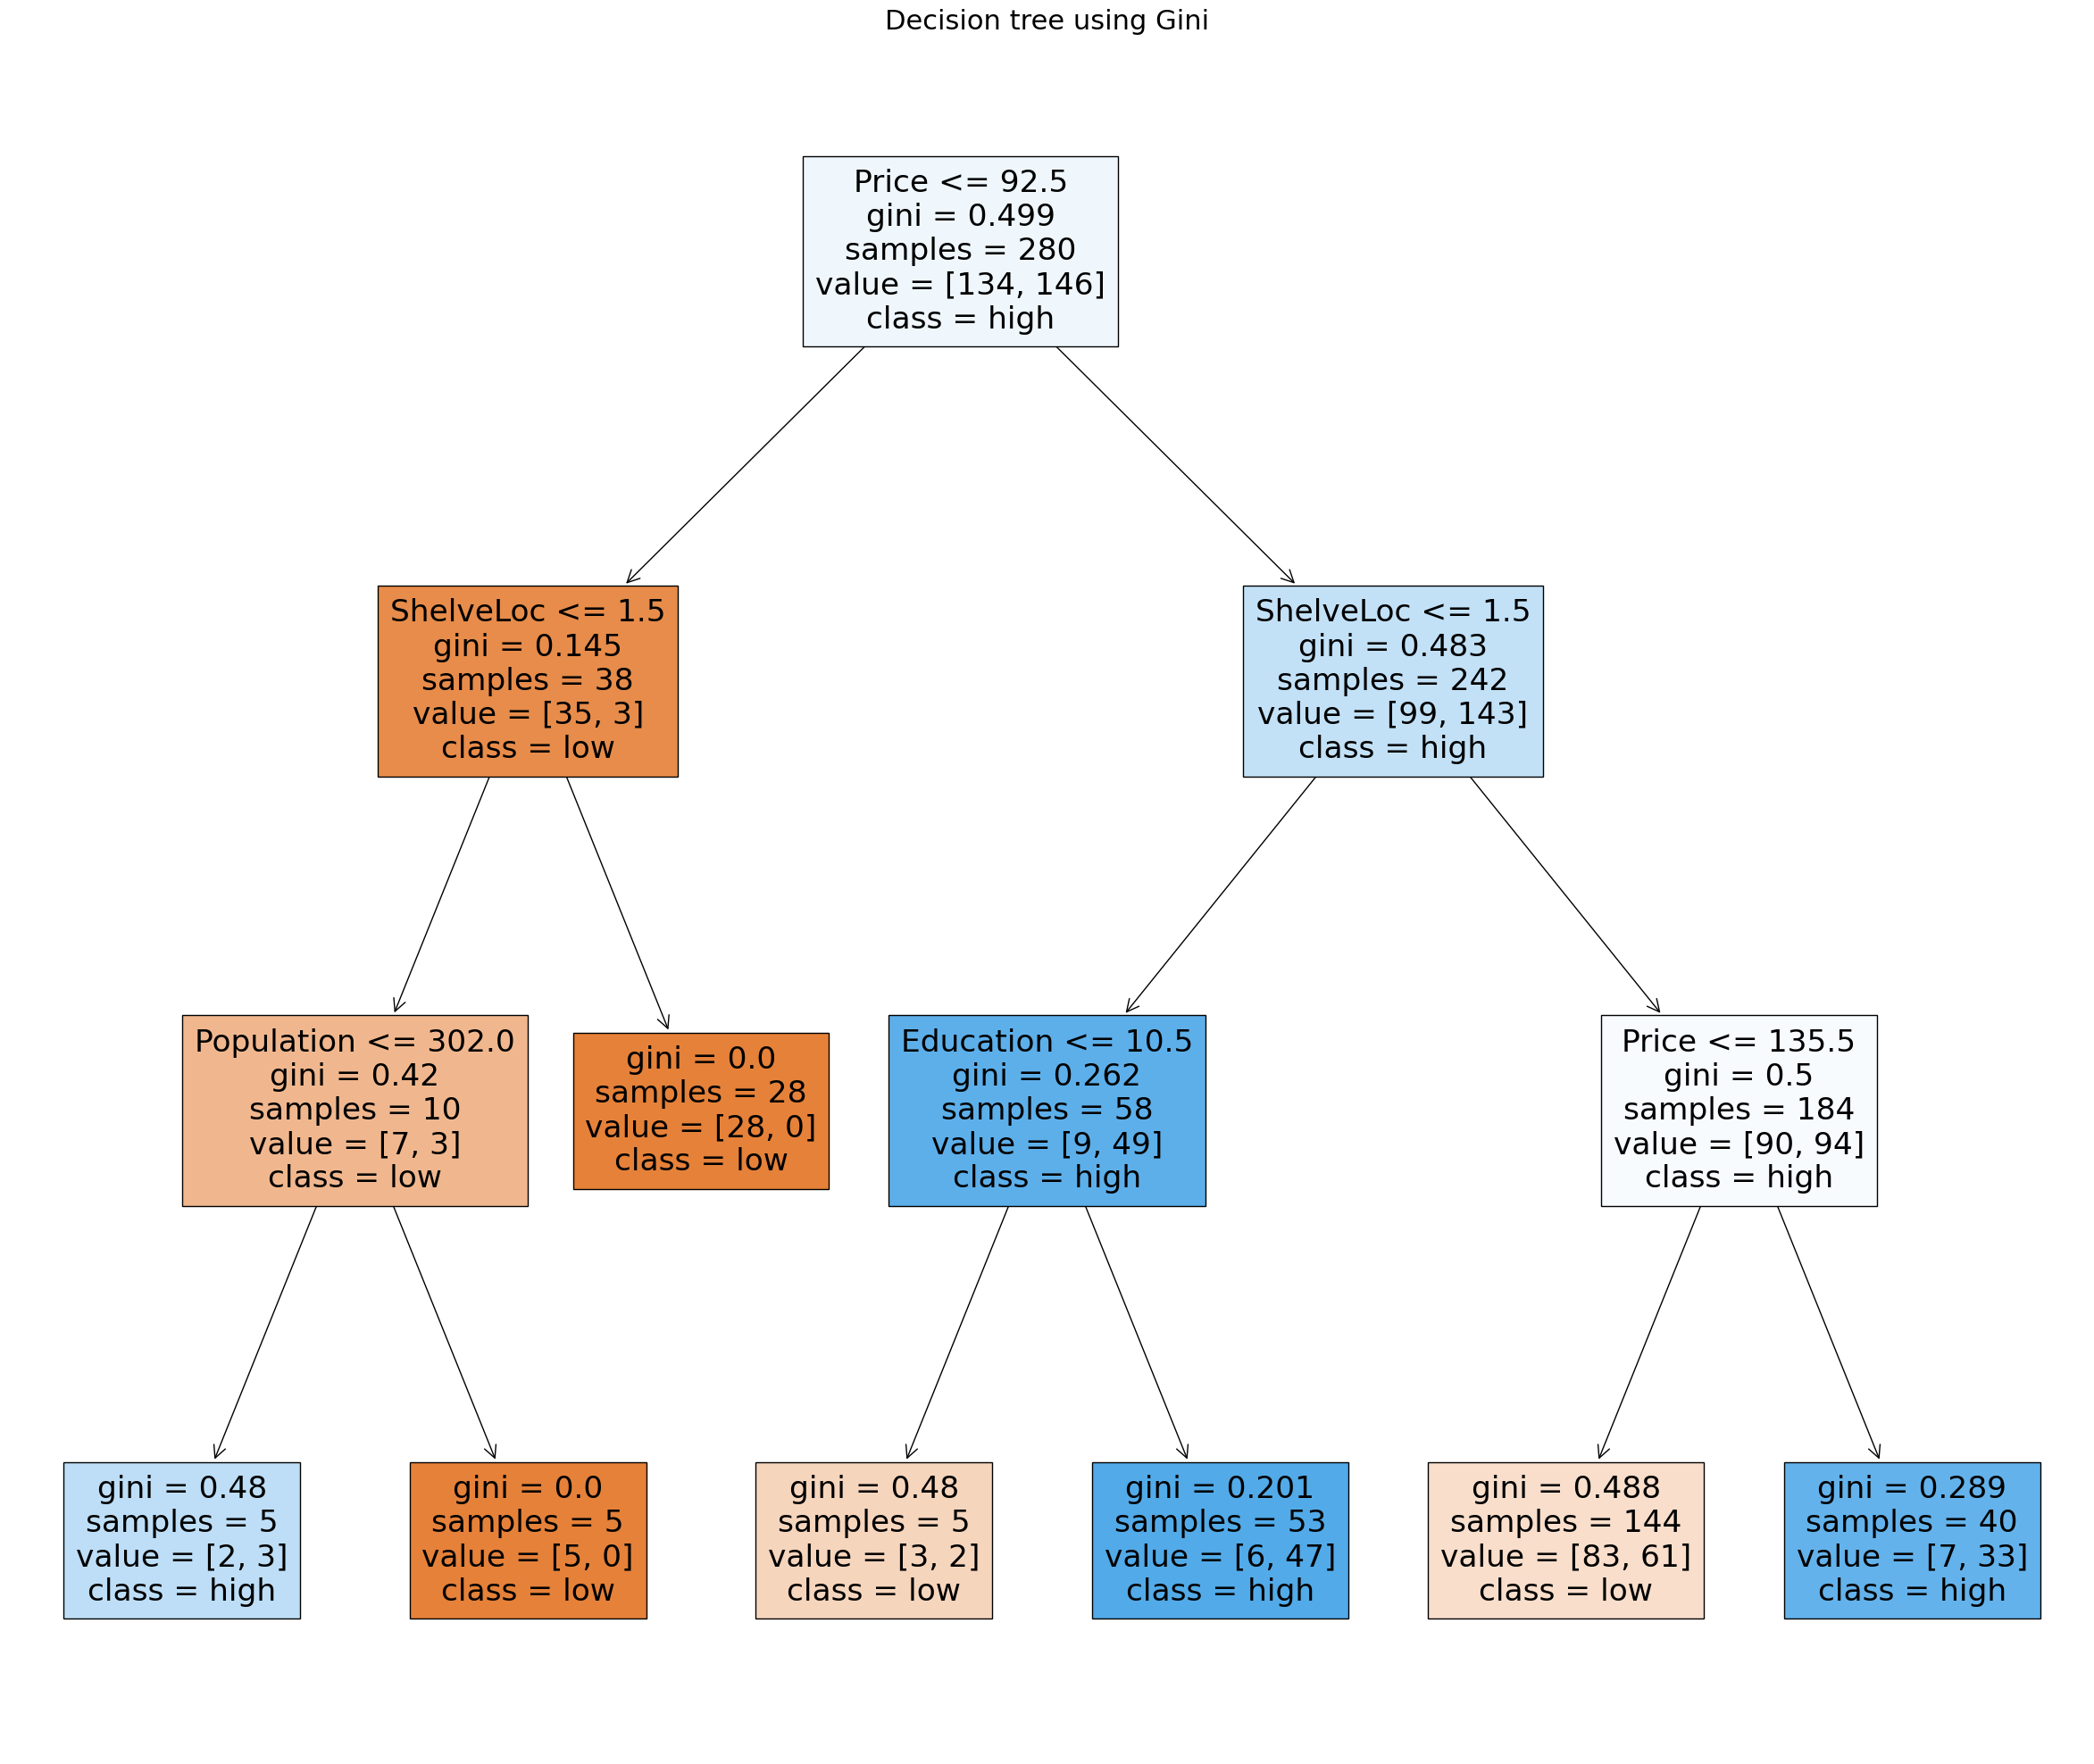

In [114]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

# Confusion Matrix

Classification Report                precision    recall  f1-score   support

        high       0.73      0.71      0.72        65
         low       0.67      0.69      0.68        55

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



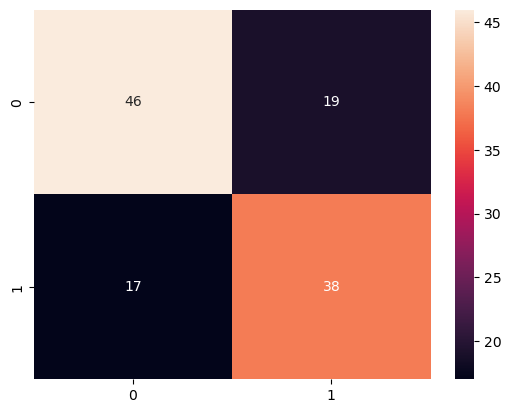

In [115]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,preds))

# Finding important features to improve Accuracy

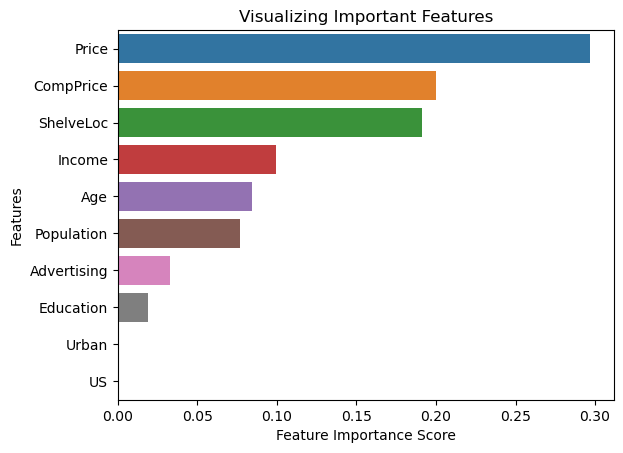

In [119]:
# feature scores
feature_scores = pd.Series(model_gini3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# adding title to the graph
plt.title("Visualizing Important Features")

# visualizing the graph
plt.show()

'Price' turns out to be the most important feature and 'Urban' and 'US', the least important feature.

# Extracting important features

In [120]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [121]:
# droping some of the least important features to rebuild the model and check its effect on accuracy.

# declaring feature vector and target variable
X = new_data.drop(['company_val', 'Education', 'Urban', 'US'], axis=1)
y = new_data['company_val']

In [122]:
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
0,9.50,138,73,11,276,120,1,42
1,11.22,111,48,16,260,83,2,65
2,10.06,113,35,10,269,80,3,59
3,7.40,117,100,4,466,97,3,55
4,4.15,141,64,3,340,128,1,38


# Rebuilding Random Forest Model on selected features

In [123]:
# splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [124]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [125]:
#Predicting on train data
pred_train3 = model_gini3.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

#Predicting on test data
pred_test3 = model_gini3.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)

Train data Accuracy is: 100.0
Test data Accuracy is: 100.0


The Accuracy after extracting feature is 100%.

# Conclusions:
### 1. Built and trained a Decision Tree Classifier Model using Entropy and Gini Criterion.
### 2. The Accuracy of the Model using Entropy Criteria performig depth tuning showed stability with the accuracy.
### 3. The Accuracy of the Model using Gini Criteria performig depth tuning also showed a good accuracy score.
### 4. The model performs reasonably well, with a good balance between precision and recall for both 'high' and 'low' classes.
### 5. The overall accuracy is 72%, and the weighted average metrics provide a more comprehensive view, considering the class distribution.

# Conclusions:
1. Built and trained a Decision Tree Classifier Model using Entropy and Gini Criterion.
2. The Model showed less accuracy initially using both the methods.
3. Therefore, extracted some of the most important features from the dataset and implemented on the Gini Model.
4. 'Price' turned out to be the most important feature and 'Urban' and 'US', the least important feature.
4. The performance of the Model showed exceptionally well post extracting the features and was found out to be 1.00.
5. The Model is making perfect predictions without any errors.
6. This Model can be implemented to predict the sale of cloth.